In [1]:
import os
import time
import numpy as np
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

In [2]:
# Folder path to dataset
path = "./datasets/data.csv"
breast_df = pd.read_csv(path)

Let's look into our datasets

In [3]:
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_df.shape # n_data x n_cols

(569, 33)

In [5]:
# Look into datasets
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Notice there is a column named 'Unnamed32' where all it's data is Nan. It is useless...
Also we need to seperate the target columns: diagnosis with the training data

In [6]:
# seperate target and dataset
targets = breast_df.diagnosis
data = breast_df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Take a look at dataset statistical overview
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Check index
print(data.index, targets.index)

RangeIndex(start=0, stop=569, step=1) RangeIndex(start=0, stop=569, step=1)


Plotting

Number of Benign data: 357
NUmber of Malignant data: 212


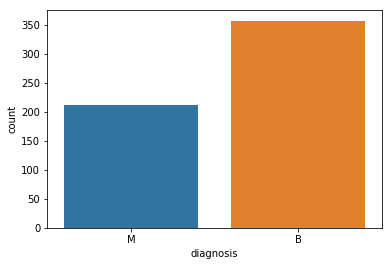

In [11]:
# Count Plot of target distribution
ax = sns.countplot(targets, label="Count")

B, M = targets.value_counts()
print("Number of Benign data:", B)
print("NUmber of Malignant data:", M)

Distribution Plot

In [12]:
# save dataframe's columns label
columns = data.columns

# Normalize our dataset
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scl = std_scaler.fit_transform(data.values) #fit numpy array
data = pd.DataFrame(x_scl)

data.columns = columns
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Violin Plot

In [32]:
# define function to violin plot 
def violin_plotting(df, hue="diagnosis", vals=None): #if all 10 features are selected, just leave as None
    df = pd.melt(df, id_vars=hue, value_vars=vals,
                 var_name="features", value_name="values")
    plt.figure(figsize=(8, 6))
    sns.violinplot(x="features", y="values", hue=hue, 
                   data=df, split=True, inner="quarts")
    plt.xticks(rotation=45);

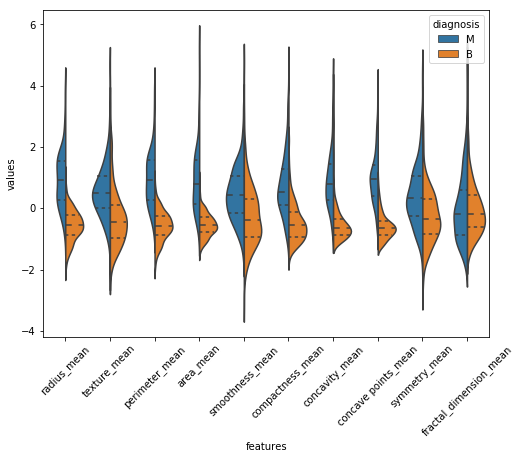

In [27]:
# Violin plot feature 1-10 distribution
df_to_plot = data.iloc[:,:10]
df_to_plot = pd.concat([targets, df_to_plot], axis=1)

violin_plotting(df_to_plot, hue="diagnosis")

Let's interpret the violin plot for the first 10 features. We can see that in some features, the distribution of *Malignant* and *Benign* looks seperated. For example, The violin plot of **radius_mean**, **perimeter_mean**, **area_mean**, **compactness_mean** seperates well the median and mean of *Malignant* and *Benign* cell.

This is a strong feature that is inherited from the nature of cancer cell and is good for classification.

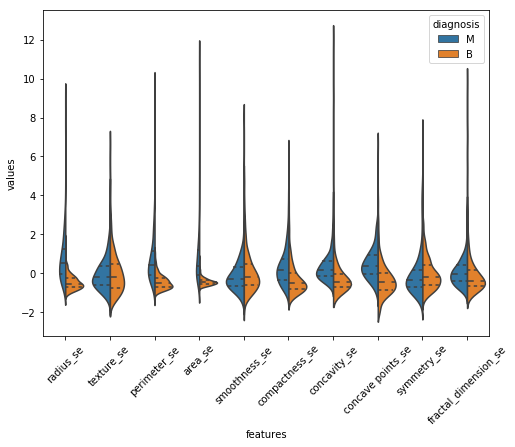

In [28]:
# Violin plot feature 11-20 distribution
df_to_plot = data.iloc[:,10:20]
df_to_plot = pd.concat([targets, df_to_plot], axis=1)

violin_plotting(df_to_plot, hue="diagnosis")

The interpretation for next 10 features. As mentioned, some features can distinguish well the distribution values (eg: area, perimeter, concavity) of *Malignant* and *Benign* cell. By looking at the mean of the distribution in each plot, can you name which are the features that distinguish well the cancer type? I only spot **radius_se**, **perimeter_se**, and **area_se**. There are lesser of them compared to those from the first 10 features.

However **smoothness_se** and **texture_se** doesn't really look seperated and might not help in the classification task.

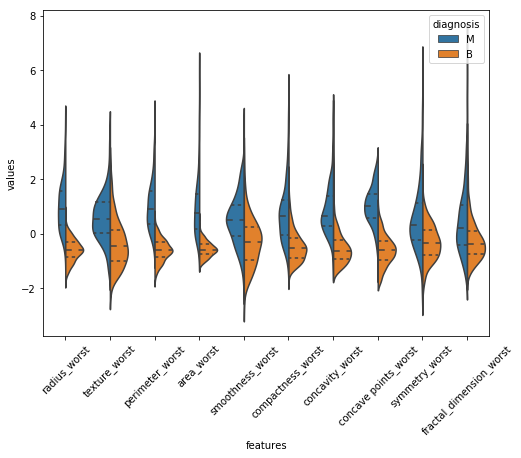

In [29]:
# Violin plot feature 21-30 distribution
df_to_plot = data.iloc[:,20:30]
df_to_plot = pd.concat([targets, df_to_plot], axis=1)

violin_plotting(df_to_plot, hue="diagnosis")

The same interpretation goes for the last plot of the last 10 features. 

Hence let's take note which are the features that seperate *Malignant* and *Benign* cell:
* radius_mean, texture_mean, perimeter_mean, area_mean
* compactness_mean, concavity_mean, concavity_point_mean
* radius_se, perimeter_se, and area_se
* radius_worst, texture_worst, perimeter_worst, area_worst
* compactness_worst, concavity_worst, concave_points_worst

Now that we have spot the strong features and the weak features in terms of classification task. Another similar way of plotting is using boxplot. In fact, violin plot and boxplot give the same insight of how the mean or median of the distribution is located at in each features.

### Boxplot

In [43]:
# define function to plot box plot
def box_plotting(df, hue="diagnosis", vals=None):
    plt.figure(figsize=(10,10))
    df= pd.melt(df, id_vars=hue, value_vars=vals,
                    var_name="features", value_name="values")
    sns.boxplot(x="features", y="values", hue=hue, data=df)
    plt.xticks(rotation=45)

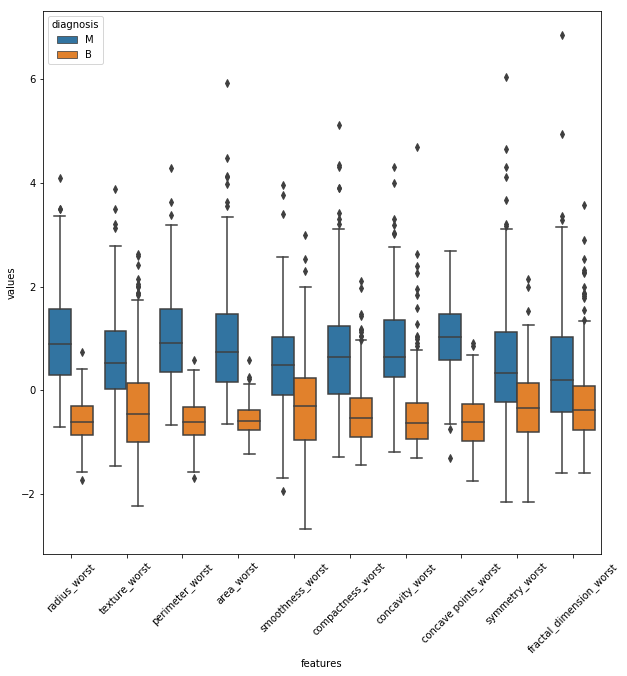

In [44]:
# Boxplot
box_plotting(df_to_plot)

The box plot above basically does the same thing with violin plot. Btw, if you look at the graph, you might notice the **concave points_worst** and **concavity_worst** distribution looks the same. They are indeed similar features. Two or more similar features actually represent the same thing in the data will only add redundancy. We will discuss about this later.

Another cool way to look into data distribution is using swarm plot. Similar to the previous plots, we can observe how each features seperate the two classification class: *Malignant* and *Benign*.

In [103]:
# define a function to create swarm plot
sns.set(style="whitegrid", palette="muted")
def swarm_plotting(data, hue=None, figsize=(12,10)):
    plt.figure(figsize=figsize)
    data = pd.melt(data, id_vars=hue, var_name="features", value_name="values")
    sns.swarmplot(x="features", y="values", hue=hue, data=data, 
                  palette=['#78C850','#6890F0'])
    plt.xticks(rotation=45)

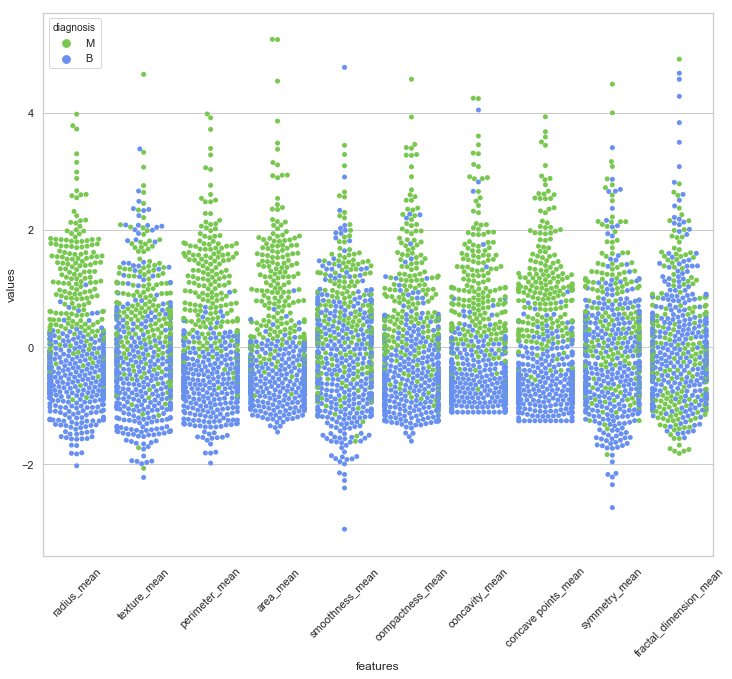

In [101]:
# swarm plot feature 1-10
df_to_plot = pd.concat([targets, data.iloc[:,:10]], axis=1)
swarm_plotting(df_to_plot, hue="diagnosis")

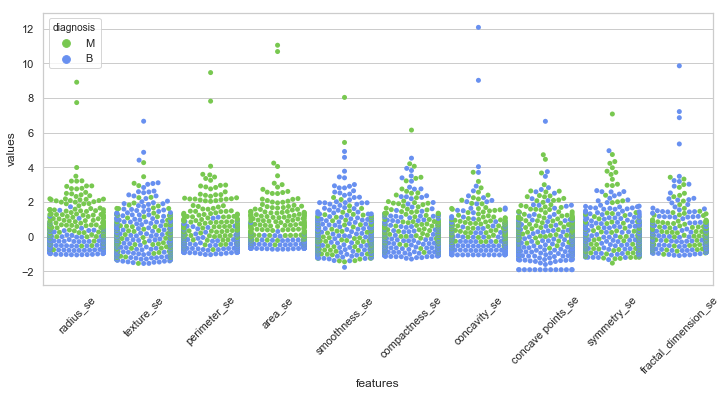

In [105]:
# swarm plot feature 11-20
df_to_plot = pd.concat([targets, data.iloc[:,10:20]], axis=1)
swarm_plotting(df_to_plot, hue="diagnosis", figsize=(12,5))

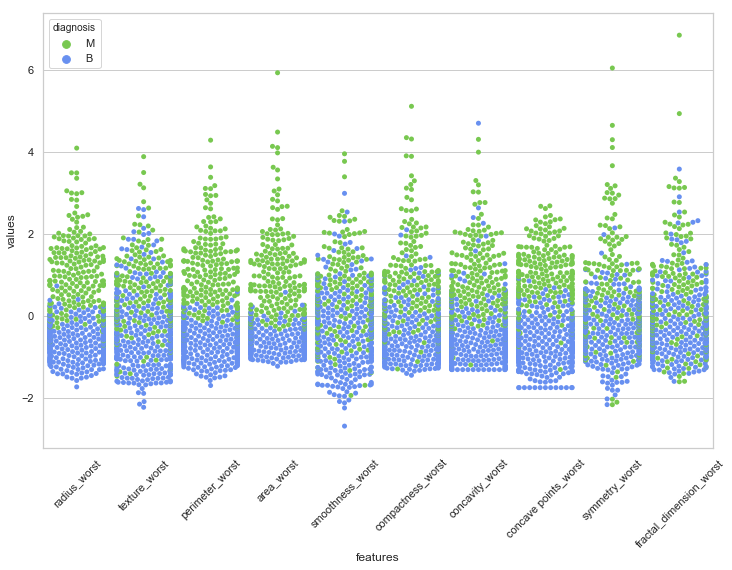

In [106]:
# swarm plot feature 11-20
df_to_plot = pd.concat([targets, data.iloc[:,20:]], axis=1)
swarm_plotting(df_to_plot, hue="diagnosis", figsize=(12,8))

From the swarm plot, perhaps we can see better how each feature of cancer cell (eg: perimeter, area, concavity) is distributed and how they are seperated. Basically, using swarm plot, box plot, or violin plot will usually gives the same insight about how two category of cancer cell are distributed with respect to its properties. Hence, you can actually choose one of the plot methods.

### Redundancy Analysis

Let's jump to the redundancy analysis. If you look carefully, **concave points_worst** and **concavity_worst** are indeed correlated. The Pearson value ranges from 1.0 to -1.0. The correlation is strong if the value is close to 1.0 or -1.0 and weak if the value is close to zero. According to Cauchy, the line plot of the two features will fit a line perfectly when the correlation is strong.

Take a look a the plot below.

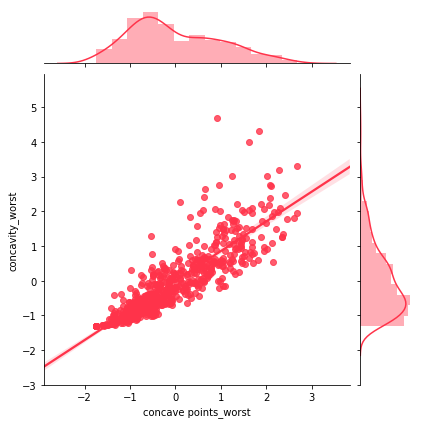

In [49]:
sns.jointplot(x="concave points_worst", y="concavity_worst", 
                  data=data, kind="regg", color="#FF334A");

Recall that we can tell how one feature is correlated to each other by observing the joint plot: if it fits well in a linear line, hence the two features are strongly correlated and possibly one of them is redundant.

The presence of redundant features can be checked through exploratory analysis, then their correlations to the other features. If the correlation of two features is close to 1.0, the two features is said to be correlated and hence one of them can be droped/purged from the dataset. 

Now, how about having three or more feature plots at the same time? Take a look at feature: **area_mean**, **perimeter_mean**, **radius_mean**. Could the three features be redundant? If do which one should we take? Before answering those questions, let's do some more line plot on the three features.

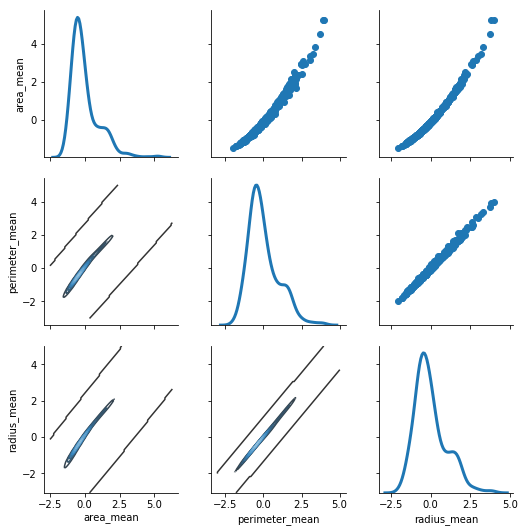

In [56]:
g = sns.PairGrid(data.loc[:,['area_mean', 'perimeter_mean', 'radius_mean']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(plt.scatter)

We observe that the three features are indeed correlated to each other. We will drop this redundant features along with the least weak features.  